# USA Residential Building Energy Consumption Survey Regression Project
## 미국 주거용 건물 에너지 소비 회귀 분석
- 2015년 미국 EIA RBECS 1억 1,820만 가구를 대표하는 5,600가구
- https://www.kaggle.com/datasets/claytonmiller/2015-residential-energy-consumption-survey

#### feature (759개)

#### targets (1개)
- KWH: 전력 소비량

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import pandas as pd

# 데이터 호출
r_df = pd.read_csv('./datasets/ResidentialBuildingEnergyConsumption.csv', low_memory=False)
r_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,15682,2,3,METRO,U,5,0,-2,-2,-2,...,1,102.40,5,1,137.45,-2,-2,91.33,-2,-2
5682,15683,3,6,MICRO,C,2,0,0,0,-2,...,0,99.34,1,0,137.45,-2,-2,91.33,-2,-2
5683,15684,2,3,METRO,U,5,0,-2,-2,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
5684,15685,3,7,METRO,R,2,0,0,0,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2


In [3]:
# 데이터 프레임 복제
pre_r_df = r_df.copy()

In [4]:
# 결측치 제거
pre_r_df = pre_r_df[~pre_r_df.isna().any(axis=1)].reset_index(drop=True)

In [5]:
# 불필요한 피처 제거
pre_r_df = pre_r_df.drop(labels='DOEID', axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder

# 데이터 프레임 복제
enc_r_df = pre_r_df.copy()
encoders = {}

# 문자열 컬럼 추출
columns = columns = ['METROMICRO', 'UATYP10', 'CLIMATE_REGION_PUB', 'IECC_CLIMATE_PUB']

# 반복하여 컬럼 인코딩 처리:
for column in columns:
    # 레이블인코더 객체 생성
    encoder = LabelEncoder()
    # 문자열 데이터 정수로 형변환
    result = encoder.fit_transform(enc_r_df[column])
    # 형변환 값으로 대체
    enc_r_df[column] = result
    # 원본 데이터 담기
    encoders[column] = encoder.classes_

In [7]:
# 타겟 컬럼 위치 변경을 위해 새로운 컬럼에 데이터 담기
enc_r_df['target'] = enc_r_df.TOTALDOL
# 기존 컬럼은 제거
enc_r_df = enc_r_df.drop(labels='TOTALDOL', axis=1)

In [8]:
# 타겟 데이터 이상치 제거
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
std = StandardScaler()
# 데이터 표준화 변환
result = std.fit_transform(enc_r_df)
# 표준화 데이터 프레임 생성
std_r_df = pd.DataFrame(result, columns=enc_r_df.columns)

for column in std_r_df.columns:
    # 타겟 데이터 이상치 제거
    copy_std_r_df = std_r_df[std_r_df[column].between(-1.96, 1.96)]

# 이상치 제거후 유지되는 인덱스를 대조하여 원본 데이터 이상치 제거
enc_r_df = enc_r_df.iloc[copy_std_r_df.index].reset_index(drop=True)

### Ⅲ. 분석

### 🌟 1Cycle

#### 🚩 1Cycle 결과
- 선형 회귀  
**MSE: 0.0001, RMSE: 0.0076, R2: 1.0000**

- 회귀 모델(LGBMRegressor)  
**MSE: 3771.3507, RMSE: 61.4113, R2: 0.9932**

#### 💡 분석
- 회귀 분석 결과가 모두 1에 가깝게 나타났으나,  
  모델 평가 지표 확인 시 다중 공산성 등 다양한 수치들에 문제가 있는 것으로 보여져 적합하지 않은 모델이라 판단됨.
- 해당 문제를 해결하기 위해 차원 축소 진행 후 성능 평가를 확인하고자 함.

---

### 🌟 2Cycle

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
         .format(MSE, RMSE, R2))

#### 📊 차원 축소

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_r_df.iloc[:, :-1], enc_r_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

In [11]:
# 학습 및 테스트 데이터로 병합
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [12]:
from sklearn.decomposition import PCA

# 차원 축소 객체 생성
# n_components: 얼마나 차원축소할 건지 작성
pca = PCA(n_components=5)

# 타겟을 제외하고 피처만 차원 축소
pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

# 크기 확인
print(pca_train.shape, pca_test.shape)

(2546, 5) (637, 5)


In [13]:
# train
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]

# 차원 축소 데이터 프레임 생성
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
# 타겟 데이터 추가
pca_train_df.loc[:, 'target'] = train_df['target']

# test
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]

# 차원 축소 데이터 프레임 생성
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
# 타겟 데이터 추가
pca_test_df.loc[:, 'target'] = test_df['target']

#### 🚩 1Cycle 결과
- 선형 회귀  
**MSE: 0.0001, RMSE: 0.0076, R2: 1.0000**

- 회귀 모델(LGBMRegressor)  
**MSE: 3771.3507, RMSE: 61.4113, R2: 0.9932**

#### 🚩 2Cycle 결과
- 차원축소 - 선형 회귀  
**MSE: 133157.7425, RMSE: 364.9079, R2: 0.7626**

- 차원축소 - 회귀 모델 (GradientBoostingRegressor)  
**MSE: 131765.3569, RMSE: 362.9950, R2: 0.7650**

#### 💡 분석
- 차원 축소 시 성능은 떨어지나 다중 공산성 등 지표가 해소된 것으로 나타남.  
  따라서 해당 모델을 사용하는 것이 적합하다 판단됨.

---

### 🌟 3Cycle
K-Fold, GridSearchCV를 통한 교차검증

#### 🚩 2Cycle 결과
- 차원축소 - 회귀 모델 (GradientBoostingRegressor)  
**MSE: 131765.3569, RMSE: 362.9950, R2: 0.7650**

#### 🚩 3Cycle 결과
- K-Fold (GridSearchCV)  
**MSE: 130125.9610, RMSE: 360.7298, R2: 0.7680**

#### 💡 분석
- 교차 검증 후 성능이 더 향상된 것을 확인하였으며,  
  <code>'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 40, 'n_estimators': 60</code> 에서 가장 높은 성능이 나타나는 것으로 확인함.
- 정규화 및 표준화 처리 후 성능 변화를 확인해 보기로 함.

---

### 🌟 4Cycle
StandardScaler, MinMaxScaler를 통한 전처리

#### 🚩 3Cycle 결과
- K-Fold (GridSearchCV)  
**MSE: 130125.9610, RMSE: 360.7298, R2: 0.7680**

#### 🚩 4Cycle 결과
- StandardScaler  
**MSE: 241806.4986, RMSE: 491.7382, R2: 0.5616**

- MinMaxScaler  
**MSE: 319484.7229, RMSE: 565.2298, R2: 0.4208**

#### 💡 분석
- 정규화 및 표준화 전처리 시 오히려 성능이 저하되는 것으로 나타나 별도의 전처리는 진행하지 않음.
- 과적합 여부를 확인하여 모델이 적합한지 판단하고 규제 적용 여부를 확인해 보기로 함.

---

### 🌟 5Cycle
과적합 확인 후 규제 여부 판단

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(MSLE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
         .format(MSE, RMSE, MSLE, RMSLE, R2))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_r_df.iloc[:, :-1], enc_r_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 검증 데이터 분리
val_X_train, val_X_test, val_y_train, val_y_test = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

# 파이프 라인 구축
pipe = Pipeline([('pca', PCA(n_components=5)), ('gb_r', GradientBoostingRegressor(random_state=124))])

# 파라미터 값 조정
parameters = {
    'gb_r__n_estimators': [55, 60, 65],
    'gb_r__learning_rate': [0.1],
    'gb_r__max_depth': [4],
    'gb_r__min_samples_split': [39, 40, 41]
}

# 교차검증
kfold = KFold(n_splits=5, random_state=124, shuffle=True)

# 학습 및 교차 검증 모델 설정
gb_r = GridSearchCV(pipe, param_grid=parameters, cv=kfold, n_jobs=-1)

# 훈련
gb_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=124, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(n_components=5)),
                                       ('gb_r',
                                        GradientBoostingRegressor(random_state=124))]),
             n_jobs=-1,
             param_grid={'gb_r__learning_rate': [0.1], 'gb_r__max_depth': [4],
                         'gb_r__min_samples_split': [39, 40, 41],
                         'gb_r__n_estimators': [55, 60, 65]})

In [16]:
# 최적의 모델
o_gb_r = gb_r.best_estimator_

# 예측
prediction = o_gb_r.predict(X_train)

# 평가
get_evaluation(y_train, prediction)

MSE: 87229.9717, RMSE: 295.3472, MSLE: 0.0320, RMSLE: 0.1789, R2: 0.8440


In [17]:
# 최적의 모델
val_gb_r = gb_r.best_estimator_

# 예측
prediction = val_gb_r.predict(val_X_train)

# 평가
get_evaluation(val_y_train, prediction)

MSE: 84132.9321, RMSE: 290.0568, MSLE: 0.0315, RMSLE: 0.1774, R2: 0.8495


In [18]:
# 최적의 모델
t_gb_r = gb_r.best_estimator_

# 예측
prediction = t_gb_r.predict(X_test)

# 평가
get_evaluation(y_test, prediction)

MSE: 127185.1367, RMSE: 356.6303, MSLE: 0.0498, RMSLE: 0.2231, R2: 0.7694


#### 📊 cross val score

In [19]:
from sklearn.model_selection import cross_val_score

# 점수 확인
score = cross_val_score(o_gb_r, features, targets)
score

array([0.8017194 , 0.78198641, 0.79435576, 0.75376305, 0.77642281])

MSE: 87229.9717, RMSE: 295.3472, MSLE: 0.0320, RMSLE: 0.1789, R2: 0.8440
MSE: 84132.9321, RMSE: 290.0568, MSLE: 0.0315, RMSLE: 0.1774, R2: 0.8495
MSE: 127185.1367, RMSE: 356.6303, MSLE: 0.0498, RMSLE: 0.2231, R2: 0.7694


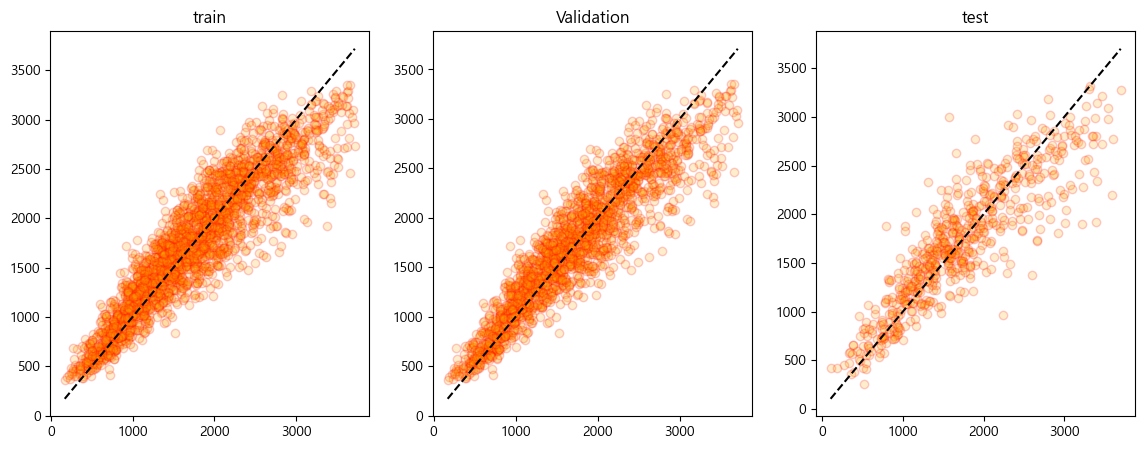

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# 최적의 모델
o_gb_r = gb_r.best_estimator_
# 예측
prediction = o_gb_r.predict(X_train)
# 평가
get_evaluation(y_train, prediction)

ax[0].scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
ax[0].set_title('train')

# 최적의 모델
val_gb_r = gb_r.best_estimator_
# 예측
prediction = val_gb_r.predict(val_X_train)
# 평가
get_evaluation(val_y_train, prediction)

ax[1].scatter(val_y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[1].plot([val_y_train.min(), val_y_train.max()], [val_y_train.min(), val_y_train.max()], 'k--')
ax[1].set_title('Validation')

# 최적의 모델
val_gb_r = gb_r.best_estimator_
# 예측
prediction = val_gb_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

ax[2].scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax[2].set_title('test')

plt.show()

In [21]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

features, targets = enc_r_df.iloc[:, :-1], enc_r_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 검증 데이터 분리
val_X_train, val_X_test, val_y_train, val_y_test = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

lasso = Lasso(alpha=1, max_iter=10000)

lasso.fit(val_X_train, val_y_train)

Lasso(alpha=1, max_iter=10000)

MSE: 0.6218, RMSE: 0.7885, MSLE: 0.0000, RMSLE: 0.0005, R2: 1.0000
MSE: 0.4910, RMSE: 0.7007, MSLE: 0.0000, RMSLE: 0.0004, R2: 1.0000
MSE: 1.3928, RMSE: 1.1802, MSLE: 0.0000, RMSLE: 0.0005, R2: 1.0000


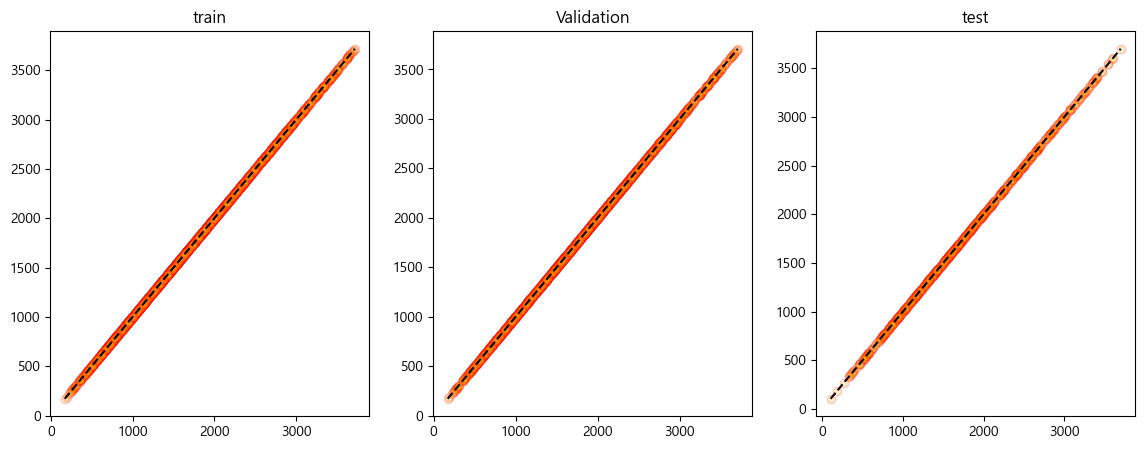

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# 예측
prediction = lasso.predict(X_train)
# 평가
get_evaluation(y_train, prediction)

ax[0].scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
ax[0].set_title('train')

# 예측
prediction = lasso.predict(val_X_train)
# 평가
get_evaluation(val_y_train, prediction)

ax[1].scatter(val_y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[1].plot([val_y_train.min(), val_y_train.max()], [val_y_train.min(), val_y_train.max()], 'k--')
ax[1].set_title('Validation')

# 예측
prediction = lasso.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

ax[2].scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax[2].set_title('test')

plt.show()

In [23]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

features, targets = enc_r_df.iloc[:, :-1], enc_r_df.iloc[:, -1]

X_trian, X_test, y_trian, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 검증 데이터 분리
val_X_train, val_X_test, val_y_train, val_y_test = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

ridge = Ridge(alpha=1e+1, max_iter=10000)
ridge.fit(val_X_train, val_y_train)

Ridge(alpha=10.0, max_iter=10000)

MSE: 0.0024, RMSE: 0.0488, MSLE: 0.0000, RMSLE: 0.0001, R2: 1.0000
MSE: 0.0001, RMSE: 0.0071, MSLE: 0.0000, RMSLE: 0.0000, R2: 1.0000
MSE: 0.0033, RMSE: 0.0575, MSLE: 0.0000, RMSLE: 0.0000, R2: 1.0000


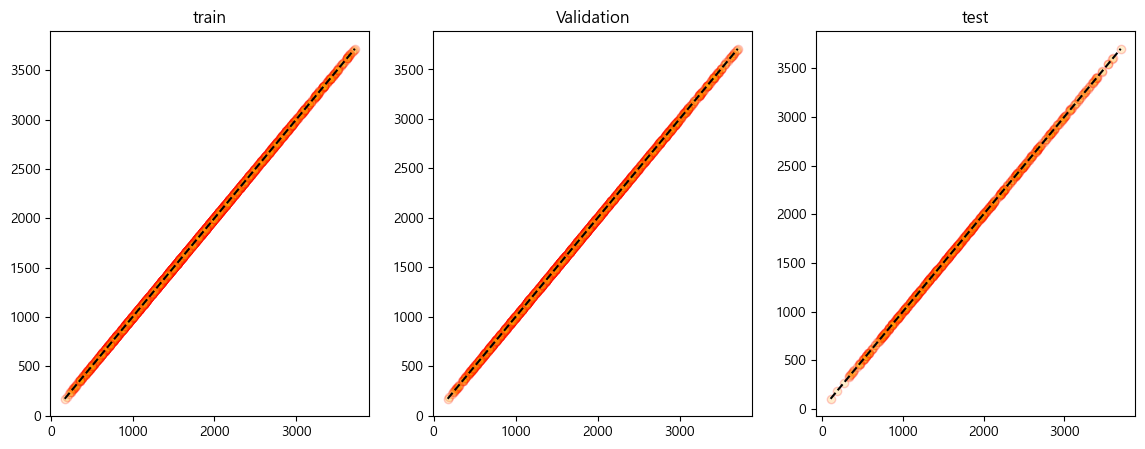

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# 예측
prediction = ridge.predict(X_train)
# 평가
get_evaluation(y_train, prediction)

ax[0].scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
ax[0].set_title('train')

# 예측
prediction = ridge.predict(val_X_train)
# 평가
get_evaluation(val_y_train, prediction)

ax[1].scatter(val_y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[1].plot([val_y_train.min(), val_y_train.max()], [val_y_train.min(), val_y_train.max()], 'k--')
ax[1].set_title('Validation')

# 예측
prediction = ridge.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

ax[2].scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax[2].set_title('test')

plt.show()